# Daily Assignment after Lecture 9- Spring 2025
# Villas-Boas

# Lecture 9 EEP 118 Spring 2025

Please work on this notebook as your daily assignment after Lecture 9 (in 2025, I may finish or repeat lecturing this material in Lecture 10 since we may run out of time in Lecture 9, and I do not want to rush explaining this). See the media gallery video for the theory of this test in the end of Lecture 9 or then in the Lecture10 video. 


I  will also post Video 4 on this notebook as a "How to EEP Series" on how to test for the equality of the proportions of yes answers in two different populations.


In [14]:
# Load the 'pacman' package
install.packages("pacman")
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)

#set scientific display off, thank you Roy
options(scipen=999)

# Loading packages
pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse,psych)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots
# psych for using describe later on




Installing package into ‘/srv/r’
(as ‘lib’ is unspecified)



In [15]:
#-------------------------------------------
#1. Read in data
#-------------------------------------------
my_data <- read_dta("data2024.dta")
head(my_data)

timestamp,went2class,soccerfan,correct1,correct2,correctboth,numberCorrect,went2Class,isSoccerFan
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2/6/2024 10:53:19,yes,yes,1,1,1,2,1,1
2/6/2024 11:01:25,yes,yes,1,0,0,1,1,1
2/6/2024 11:11:24,yes,yes,1,1,1,2,1,1
2/6/2024 11:11:28,yes,yes,1,0,0,1,1,1
2/6/2024 11:11:52,yes,yes,1,0,0,1,1,1
2/6/2024 11:11:53,yes,no,1,1,1,2,1,0


In [16]:
#describe data
describe(my_data,skew = FALSE)

# 108 total responses

,vars,n,mean,sd,median,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
timestamp*,1,108,53.8055556,30.9529212,53.5,1,107,106,2.97844624
went2class*,2,108,1.9351852,0.2473466,2.0,1,2,1,0.02380094
soccerfan*,3,108,1.5185185,0.5019864,2.0,1,2,1,0.04830366
correct1,4,108,0.9722222,0.1651017,1.0,0,1,1,0.01588692
correct2,5,108,0.5555556,0.4992206,1.0,0,1,1,0.04803752
correctboth,6,108,0.5555556,0.4992206,1.0,0,1,1,0.04803752
numberCorrect,7,108,1.5277778,0.5546462,2.0,0,2,2,0.05337085
went2Class,8,108,0.9351852,0.2473466,1.0,0,1,1,0.02380094
isSoccerFan,9,108,0.5185185,0.5019864,1.0,0,1,1,0.04830366


### Select coming to class subsample and how many came to class?

In [17]:
#select coming to class subsample 
my_dataClass <- filter(my_data, went2Class == 1) 
my_dataNotClass<-filter(my_data, went2Class == 0)

#how many are there that came to class?
summarise(my_dataClass, trimmed_count = n())

#answer 101 out of 108 came to class

#how many are there that did not come to class?
summarise(my_dataNotClass, trimmed_count = n())

#7 did not come to class

trimmed_count
<int>
101


trimmed_count
<int>
7


In [18]:
# what is the estimated proportion of correct both for those coming to class based on the survey sample?
mean(my_dataClass$correctboth)

[1] 0.5742574

# Lets call that $\hat{p_1}$   be the p hat for having come to class

In [19]:
#Lets call that phat_1   p hat for having come to class"

phat_1<-mean(my_dataClass$correctboth)
phat_1

[1] 0.5742574

## Lets call that $Y_1$   the number of people answering correctly among those coming to class


In [20]:
#Lets call that Y_1   the number oe people answering correctly among those coming to class

Y_1<-mean(my_dataClass$correctboth)*nrow(my_dataClass)
Y_1




[1] 58

## and $N_1$  number of observations in sample 1


In [21]:
#and N1  number of observations in sample 1
N_1<-nrow(my_dataClass)
N_1

[1] 101

# note that $\hat{p_1} = \frac{Y_1}{N_1}$

## Select not coming to class subsample and how many did not come to class?

In [22]:
#select not coming to class subsample 
my_dataNotClass <- filter(my_data, went2Class == 0) 

#how many are there that did not come to class?
summarise(my_dataNotClass, trimmed_count = n())

#answer 7 out of 108 did not come to class

trimmed_count
<int>
7


In [23]:
#Lets call that phat_2   the proportion of people that answered correctly both questions among those that did not 
#come to class " p hat_2

phat_2<-mean(my_dataNotClass$correctboth)
phat_2

[1] 0.2857143

In [24]:
#Lets call that Y_2   the number of people answering correctly among those not coming to class

Y_2<-mean(my_dataNotClass$correctboth)*nrow(my_dataNotClass)
Y_2


#note that phat_2= Y_2 / N_2

#and 
N_2<-nrow(my_dataNotClass)


[1] 2

## Question: 
Test whether the proportion of answering both correctly for those
that came to class ($p_1$) is
statistically equal to to the one of those not coming to class ($p_2$), that is, $p_1=p_2$,  at the 10% significance


against an alternative that $p_1 > p_2$ , that is, 
against the alternative that those coming to class have a larger proportion $p_1$ of answering correctly than those not coming to class $p_2$.


## Recall the 5 step-procedure for hypothesis testing.



let $D=p_1 - p_2$ be  the diffference in proportions in the population

## Step 1: D=0 null, alternative D>0 one sided alternative.

## Step 2: construct the test stat  that under the null will be distributed N(0,1)

Let $\hat{D}=\hat{p_1} - \hat{p_2}$


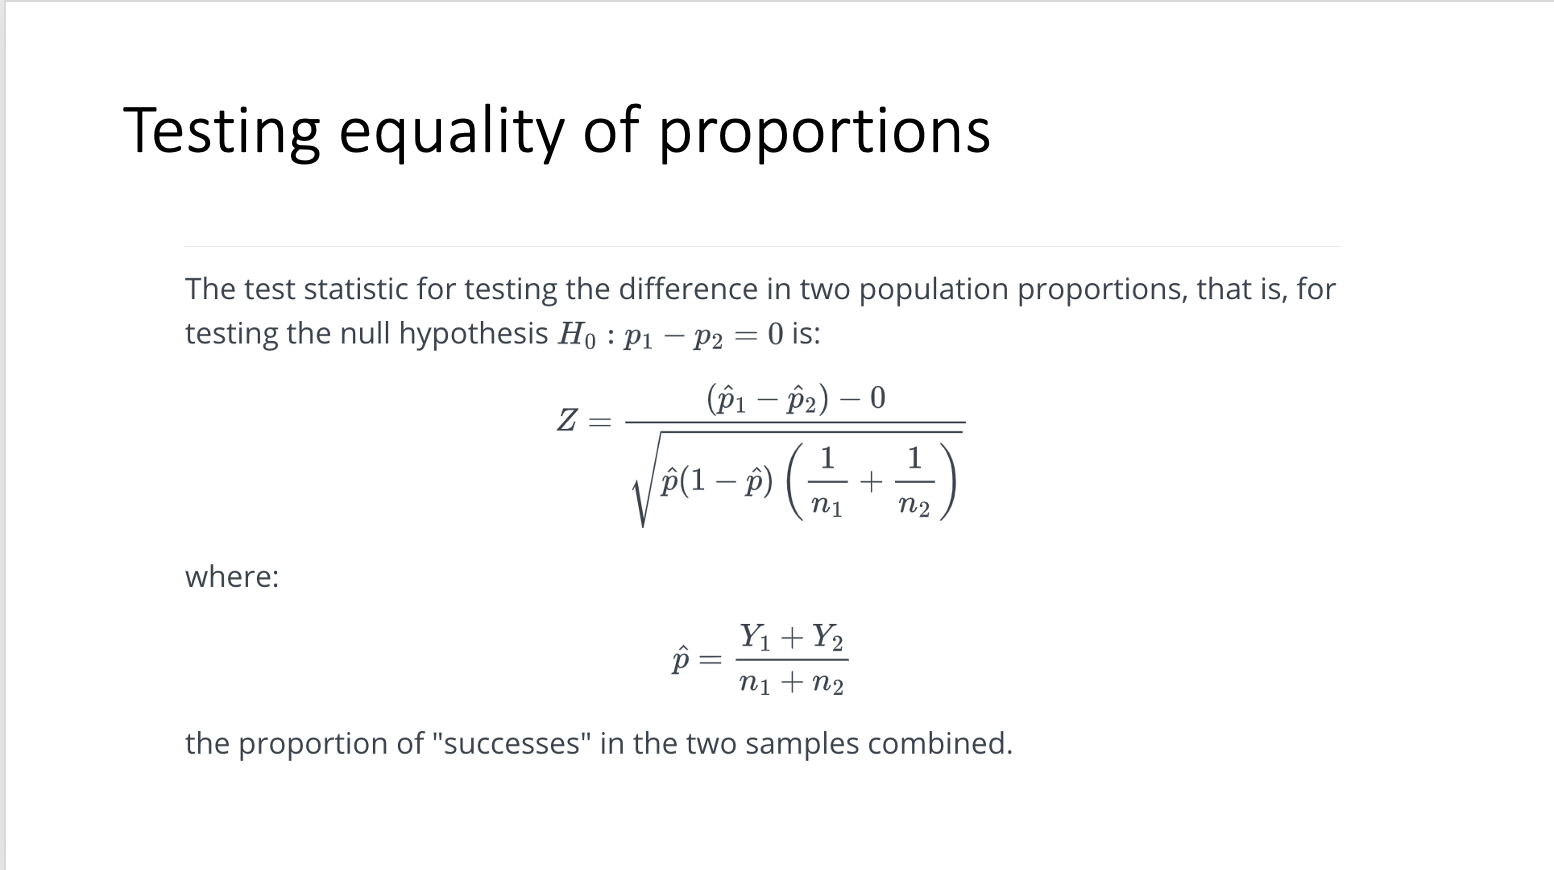







where $\hat{p_1}=\frac{Y_1}{n_1}$ and $\hat{p_2}=\frac{Y_2}{n_2}$ and we interpret $\hat{p}=\frac{Y}{n}$ as the overall proportion in the sample of correct answers, and $\hat{p_1}$ the proportion correct for the first group (coming to class), and $\hat{p_2}$ the proportion correct for the second group (not coming to class).

The sample estimate for the population $p_1$ is $\hat{p_1}=\frac{Y_1}{n_1}$
The sample estimate for the population $p_2$ is $\hat{p_2}=\frac{Y_2}{n_2}$

If under the null hypothesis $p_1=p_2=p$ then the sample estimatefor the population $p$ is  $\hat{p}=\frac{Y}{n}=\frac{Y_1+Y_2}{n_1+n_2}$

Under the null of the population proportion being p, then the variance is p (1-p) 

Recall that the sample estimate for the variance of the sample average of sample size N is 
$\frac{\hat{p} (1-\hat{p})}{N}$

We know that under the null hypothesis that $p_1=p_2=p$  then

$var(\hat{p_1})=\frac{\hat{p} (1-\hat{p})}{N_1}$

and

$var(\hat{p_2})=\frac{\hat{p} (1-\hat{p})}{N_2}$

So the variance( $\hat{D}$ ) is the variance ($\hat{p_1}-\hat{p_2}$)  = $var(\hat{p_1})+var(\hat{p_2})$

And the $se(\hat{D} )=\sqrt{variance( \hat{D} )}$

which is equivalent to 

$se(\hat{D} )=\sqrt{\frac{\hat{p} (1-\hat{p})}{N_1}+\frac{\hat{p} (1-\hat{p})}{N_1}}=\sqrt{\hat{p} (1-\hat{p}) (\frac{1}{N_1}+\frac{1}{N_1})} $

like in the formula in the Testing Equality of Proportions given above








# under the null $p_1=p_2=p$

So lets get an estimate  of that $\hat{p}$  
where $\hat{p}= \frac{Y_1+Y_2}{N_1+N_2}$



In [25]:

#get phat
phat<-(Y_1+Y_2)/(N_1+N_2)

phat

[1] 0.5555556

to construct the z statistic
 we need to get the denominator of Z (one of the last slides in Lecture 9 notes)

In [27]:
#to construct statistic
#get denominator of Z (slide 30 in Lecture 9 notes)

temp<-phat*(1-phat)*( 1/N_1 + 1/N_2 )


denom<-sqrt(temp)


denom

[1] 0.1942114

The numerator is $\hat{D}$

In [28]:
#numerator is
D_hat<-phat_1-phat_2

D_hat

[1] 0.2885431

# get z statistic 
 where $z= \frac{\hat{D}}{denom}$

#get z statistic 

#where z= Dhat/denom

z_testStatValue<-D_hat/denom
z_testStatValue

In [29]:
z_testStatValue<-D_hat/denom 
z_testStatValue

[1] 1.485717

you get that the value of the t is 1.48757

##  Step 3: given significance level alpha=10% get the Critical Z for one sided test - go to the normal (0,1) table
#get one sided 10% critical value 

#go to the z table

you will see that 
z_crit<-1.2815

The Prob [z< 1.28}=0.9, 

The area below 1.28 has 0.9 probability to its left, in the red area (probability) of the normal bell shape distribution of the Figure below.

Which means the right white mass is 10 percent, the Prob [z> 1.28}=0.1. 


<img src="criticalN10percentOneSided.png" width="600" />

In [30]:
#or get it in R by  getting the c critical value in step 3
zcritical<-qnorm(0.1,lower.tail=FALSE)
zcritical

#or  give me critical value for a normal that has 0.9 prob mass below it
zcriticaln<-qnorm(0.9,lower.tail=TRUE)
zcriticaln



#this gives you the z value that has 10 percent mass higher than it, 
#which is what we want in the one sided test

#answer is Zcritical=1.28158

[1] 1.281552

[1] 1.281552

## Step 4: Compare Z (from step 2) with Z critical (from step 3)

If the  value of z from step 2 is less than the critical value from step 3 then we fall in the non rejection area, 

that is, if z < zcritical then cannot reject the null of step 1


If the  z is greater than the zcritical then we fall in the rejection area, 
that is, if z > zcritical then we reject the null of step 1

What do you find?

since z greater than critical value we reject the null



## Step 5: Conclude. 

In this case, we reject that both proportions are the same at the 10% significance level against an alternative that $p_1$ is greater than $p_2$, that is, 

against the alternative that those coming to class have a larger proportion $p_1$ of answering correctly than those not coming to class $p_2$.

oh Yes!

# the end

# what if alpha is 1 %  lower significance level, I want to be rejecting the null when it is tru only 1 percent of the time.

instead of the 10% of before

In [31]:
#Step 1 and 2 from above still the same

#Step 3 would change

#or get it in R by  getting the c critical value in step 3
zcritical_1percent<-qnorm(0.01,lower.tail=FALSE)
zcritical_1percent

#or  give me critical value for a normal that has 0.9 prob mass below it
zcriticaln_1percent<-qnorm(0.99,lower.tail=TRUE)



[1] 2.326348

#Step 4 Now I would not be able to reject the null at 1 percent sighnificnce level in step 4

#because Zcrit=2.32 > z=1.4857

#Step 5 I cannot reject the null that the the proportions are the same at the one percent significance level.